In [1]:
import sys, threading
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from utils import *
sys.setrecursionlimit(10 ** 7)
threading.stack_size(2 ** 27)
random.seed(time.time())

In [ ]:
def parametersTxtFile(n):
    p = 1
    q = 1
    nArray = []
    tab = '\t\t\t\t\t\t'
    file = open("parameters.txt",'w')  # write in text mode
    file.write(f"p{tab}q{tab}n{tab}phi_n\n")
    for i in range(2,int(n/2)+1):
        p = generatePrime(i)    
        q = generatePrime(i)    
        while p==q:
            q = generatePrime(i)
        n = p*q
        phi_n = (p-1)*(q-1)
        file.write(f"p{tab}q{tab}n{tab}phi_n\n")
    file.close()


In [ ]:
def generateParamsConstE():
    nparr_n = []
    nparr_phi = []
    e = 7
    for i in range(3,50):
        p = generatePrime(i)
        q = generatePrime(i)
        # n = p * q
        phi_n = (p-1)*(q-1)
        while p == q or GCD(e,phi_n)!=1 or e>=phi_n:
            q = generatePrime(i)
            phi_n = (p-1)*(q-1)
        n = p*q
        print(n, phi_n)
        nparr_n.append(n)
        nparr_phi.append(phi_n)
    np.save('constE_n.npy',nparr_n,allow_pickle=True)
    np.save('constE_phi.npy',nparr_phi,allow_pickle=True)

# generateParamsConstE()
# arr1 = np.load('./constE_n.npy',allow_pickle=True)
# arr2= np.load('./constE_phi.npy',allow_pickle=True)
# print(arr1)
# print(arr2)


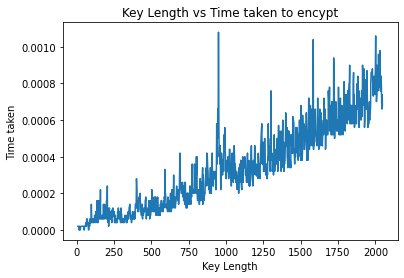

In [2]:
def encryptionTimeConstE(n):
    time_taken = [] 
    message = """
    This is a comparison of time against key length. 
    This should be a very long message so I'm increasing its length.
    In this function, e is constant while phi_n is changing
    """*10
    es = np.load('./encryptionVSkey/e_arr_e.npy',allow_pickle=True)
    moduli = np.load('./encryptionVSkey/n_arr_e.npy',allow_pickle=True)
    for i in range(1,n):
        msg_blocks = divideMsg(message,moduli[i])
        start_time = time.time()
        for _ in range(250):
            # encypted_msg = [Encrypt(block,es[i],moduli[i])for block in msg_blocks]
            encypted_msg = Encrypt(msg_blocks[0],es[i],moduli[i])
        end_time = time.time()
        time_taken.append((end_time - start_time)/250) # Time taken to brute force attack
    return moduli[1:n],time_taken

es = np.load('./encryptionVSkey/e_arr_e.npy',allow_pickle=True)
moduli, times = encryptionTimeConstE(len(es))
moduli = [len(bin(modulus)[2:]) for modulus in moduli]
plt.plot(moduli, times)
plt.xlabel('Key Length')
plt.ylabel('Time taken')
plt.title('Key Length vs Time taken to encypt')
plt.show()